In [34]:
import numpy as np
import librosa,librosa.display
import matplotlib.pyplot as plt
import os
import json
import math

In [35]:
sample_file="./classical.00003.wav"

In [36]:
signal,sample_rate=librosa.load(sample_file)

In [37]:
sample_rate

22050

In [38]:
type(signal)

numpy.ndarray

In [39]:
signal

array([-0.0083313 , -0.02258301, -0.04367065, ...,  0.00463867,
       -0.00314331, -0.00640869], dtype=float32)

In [40]:
np.max(signal),np.min(signal)
## all values are between -1 to 1

(0.30218506, -0.30044556)

## WaveForm figure

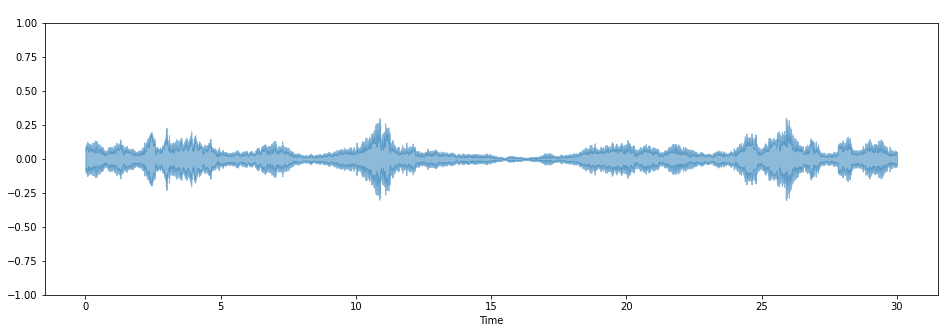

In [41]:
plt.figure(figsize=(16,5))
plt.subplot(1,1,1)
librosa.display.waveshow(signal,sr=sample_rate,alpha=0.5)
plt.title("waveform of classical genre",color='w')
plt.ylim(-1,1)
plt.show()

# CONVERTING INTO FREQUENCY DOMAIN

In [42]:
fft=np.fft.fft(signal)

taking absolute value of complex number (calculating amplitude)

In [43]:
spectrum=np.abs(fft)

In [44]:
#create frequnecy variable 
f=np.linspace(0,sample_rate,len(spectrum))

Text(0.5, 1.0, 'power Spectrum')

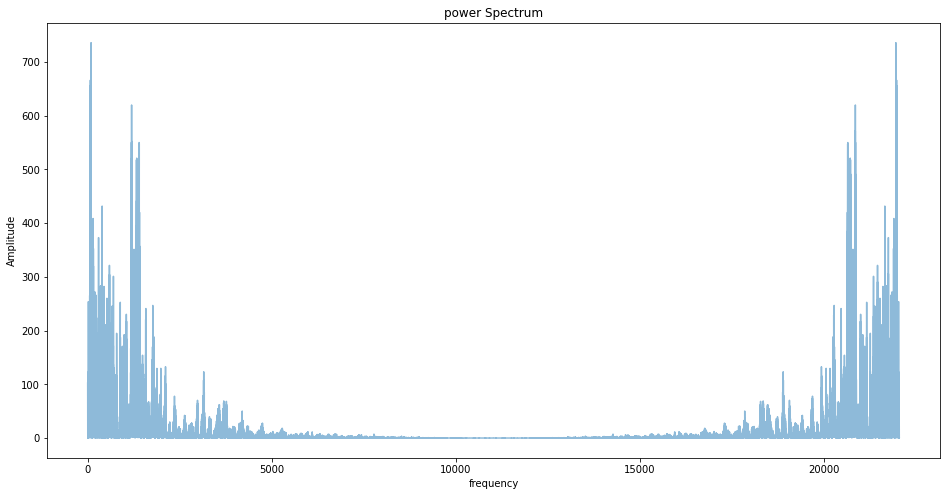

In [45]:
plt.figure(figsize=(16,8))
plt.plot(f,spectrum,alpha=0.5)
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("power Spectrum")

taking half of the spectrum values

In [46]:
left_spectrum=spectrum[:len(spectrum)//2]
left_f=f[:len(f)//2]

Text(0.5, 1.0, 'power Spectrum')

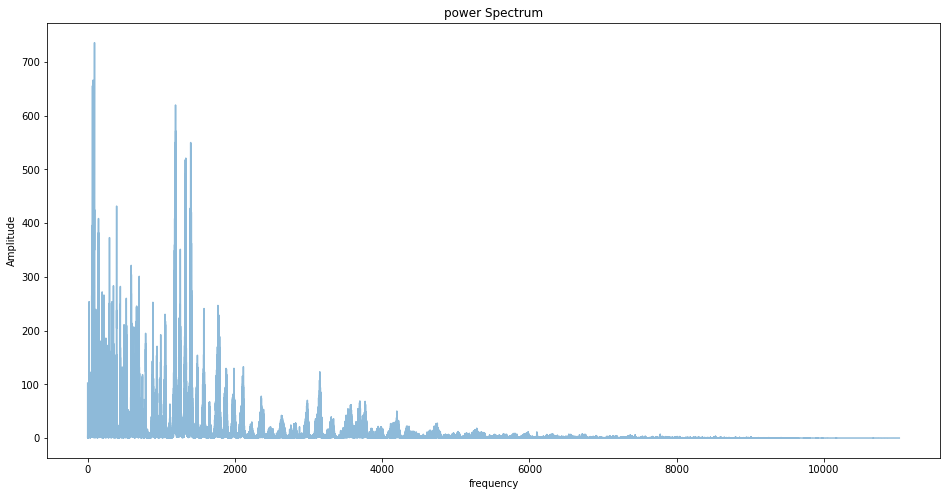

In [47]:
plt.figure(figsize=(16,8))
plt.plot(left_f,left_spectrum,alpha=0.5)
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("power Spectrum")

In [48]:
#Spectrogram (STFT)
stft=librosa.stft(signal,n_fft=2048,hop_length=512)

In [49]:
spectrogram=np.abs(stft)

Text(0.5, 1.0, 'spectrogram')

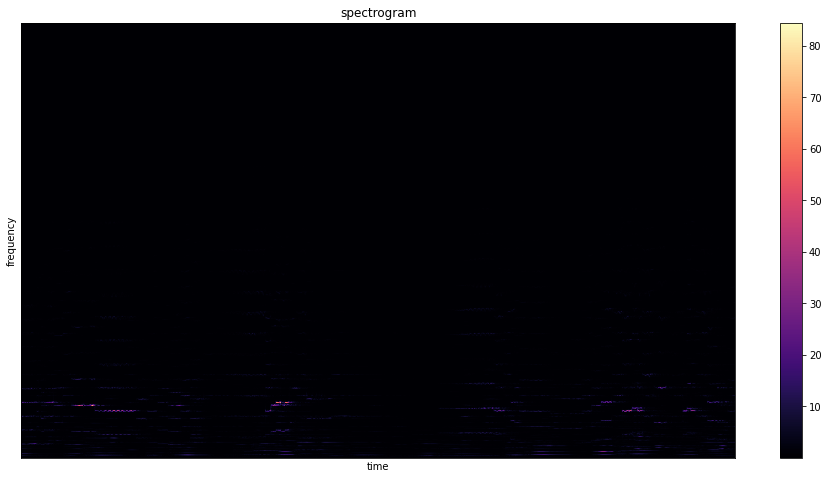

In [50]:
plt.figure(figsize=(16,8))
librosa.display.specshow(spectrogram,sr=sample_rate,hop_length=512)
plt.xlabel("time")
plt.ylabel("frequency")
plt.colorbar()
plt.title("spectrogram")

In [51]:
#applying logarithm to convert into decibel
log_spectrum=librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'logarithmic spectrogram')

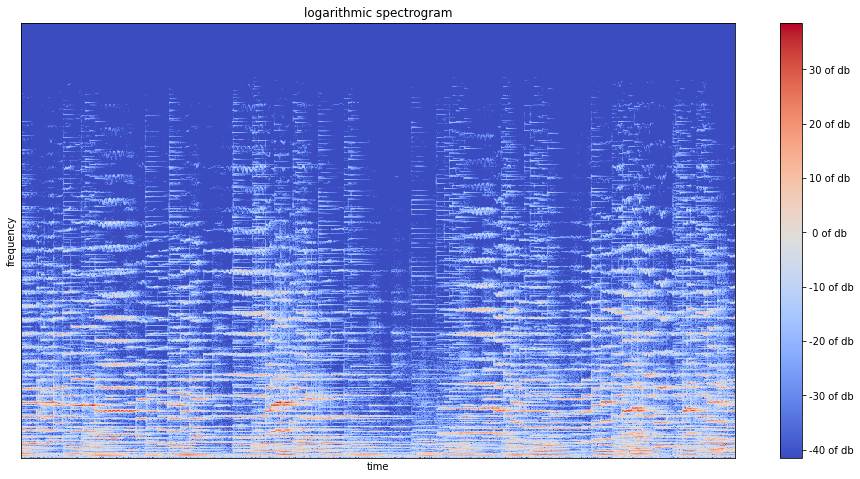

In [52]:
plt.figure(figsize=(16,8))
librosa.display.specshow(log_spectrum,sr=sample_rate,hop_length=512)
plt.xlabel("time")
plt.ylabel("frequency")
plt.colorbar(format="%2.0f of db")
plt.title("logarithmic spectrogram")

In [53]:
#MFCC (13)
mfcc=librosa.feature.mfcc(y=signal,sr=sample_rate,n_fft=2048,hop_length=512,n_mfcc=13)

Text(0.5, 1.0, 'Mfccs')

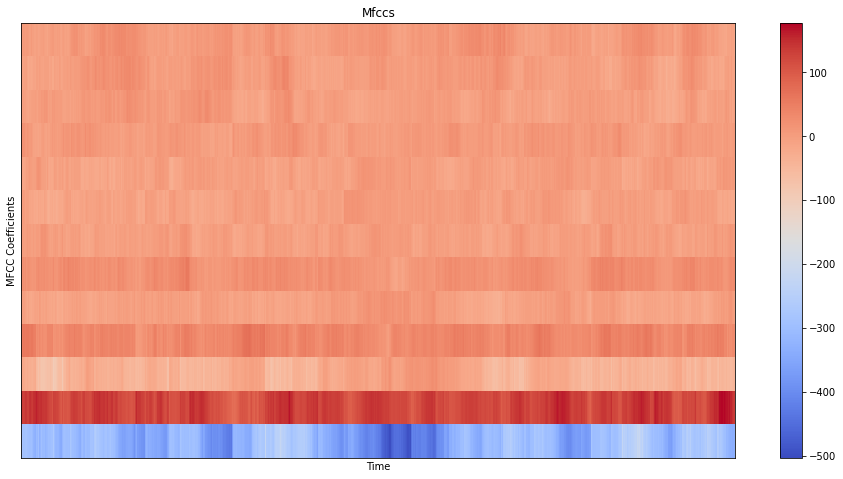

In [54]:
plt.figure(figsize=(16,8))
librosa.display.specshow(mfcc,sr=sample_rate,hop_length=512)
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.title("Mfccs")

In [55]:
DATASET_PATH="..\Data\genres_original"
JSON_PATH="Extracted_data.json"
SAMPLE_RATE=22050
TRACK_DURATION=30 # IN SECONDS
SAMPLES_PER_TRACK=SAMPLE_RATE*TRACK_DURATION 

In [56]:
os.curdir

'.'

In [57]:
def save_mfccs_of_musics(data_path,json_path,num_mfcc=13,n_fft=2048,hop_length=512,num_segments=10):
    # dictionary to store mapping, labels, and MFCCs
    data={
        "mapping":[],
        "labels":[],
        "mfcc":[]
    }
    sample_per_segement=int(SAMPLES_PER_TRACK/num_segments)
    num_mfcc_vectors_per_segment=math.ceil(sample_per_segement/hop_length)
    
    # loop through all genre sub-folder
    for i ,(dirpath,_,filenames) in enumerate(os.walk(data_path)):
        
        # ensure we're processing a genre sub-folder level
        if dirpath is not data_path:
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label=dirpath.split("\\")[-1]
            data["mapping"].append(semantic_label)
            
            # process all audio files in genre sub-dir
            for f in filenames:
                file_path=os.path.join(dirpath,f)
                # load audio file
                signal,sample_rate=librosa.load(file_path,sr=SAMPLE_RATE)
                
                 # process all segments of audio file
                for d in range(num_segments):
                    # calculate start and finish sample for current segment
                    start=sample_per_segement*d 
                    finish=start+sample_per_segement
                    # extract mfcc
                    mfcc=librosa.feature.mfcc(y=signal[start:finish],sr=sample_rate,n_mfcc=num_mfcc,n_fft=n_fft,hop_length=hop_length,)
                    mfcc=mfcc.T
                    # store only mfcc feature with expected number of vectors
                    if len(mfcc)==num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data['labels'].append(i-1)
                        print("{}, segment:{}".format(file_path,d+1))
    # save MFCCs to json file               
    with open(json_path,"w") as fp:
        json.dump(data,fp,indent=4)
                      
            

In [58]:
save_mfccs_of_musics(DATASET_PATH,JSON_PATH,num_segments=10)

..\Data\genres_original\blues\blues.00000.wav, segment:1
..\Data\genres_original\blues\blues.00000.wav, segment:2
..\Data\genres_original\blues\blues.00000.wav, segment:3
..\Data\genres_original\blues\blues.00000.wav, segment:4
..\Data\genres_original\blues\blues.00000.wav, segment:5
..\Data\genres_original\blues\blues.00000.wav, segment:6
..\Data\genres_original\blues\blues.00000.wav, segment:7
..\Data\genres_original\blues\blues.00000.wav, segment:8
..\Data\genres_original\blues\blues.00000.wav, segment:9
..\Data\genres_original\blues\blues.00000.wav, segment:10
..\Data\genres_original\blues\blues.00001.wav, segment:1
..\Data\genres_original\blues\blues.00001.wav, segment:2
..\Data\genres_original\blues\blues.00001.wav, segment:3
..\Data\genres_original\blues\blues.00001.wav, segment:4
..\Data\genres_original\blues\blues.00001.wav, segment:5
..\Data\genres_original\blues\blues.00001.wav, segment:6
..\Data\genres_original\blues\blues.00001.wav, segment:7
..\Data\genres_original\blues\